In [18]:
%matplotlib inline
from numpy import *
from matplotlib.pyplot import *
from pandas import DataFrame

**First exercise**

---

Let consider the following function in the interval $(0,1)$:

$$
f(x) = -\left|x-\frac{1}{2}\right| + \frac{1}{2}. %\quad\mathrm{ in }\ \Omega = (0, \pi)
$$

Define a function that given the interpolation points, the index of the basis and the evaluation points, return the lagrange basis. Then, plot the basis.


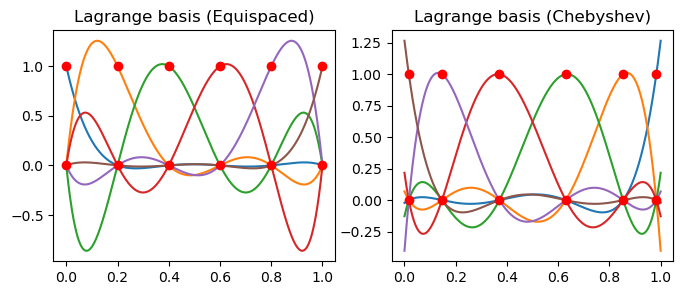

In [2]:
def lagrange_basis(
    interpolation_points: ndarray[float],
    n_basis: int,
    evaluation_points: ndarray[float],
):
    l = ones(len(evaluation_points))
    for i in range(len(interpolation_points)):
        if n_basis != i:
            l *= (evaluation_points - interpolation_points[i]) / (
                interpolation_points[n_basis] - interpolation_points[i]
            )
    return l


def chebyshev_nodes(n, a=0, b=1):
    i = array(range(n))
    x = cos((2 * i + 1) * pi / (2 * n))
    return 0.5 * (b - a) * x + 0.5 * (b + a)

n = 5
x = linspace(0, 1, 1000)

X_equispaced = linspace(0, 1, n + 1)
X_chebyshev = chebyshev_nodes(n + 1)

V_e = array([lagrange_basis(X_equispaced, i, x) for i in range(len(X_equispaced))]).T
V_c = array([lagrange_basis(X_chebyshev, i, x) for i in range(len(X_chebyshev))]).T

fig, ax = subplots(1, 2, figsize = (8, 3))
ax[0].plot(x, V_e)
ax[0].plot(X_equispaced, zeros_like(X_equispaced), "ro")
ax[0].plot(X_equispaced, ones(len(X_equispaced)), "ro")
ax[0].set_title("Lagrange basis (Equispaced)")
ax[1].plot(x, V_c)
ax[1].plot(X_chebyshev, zeros_like(X_chebyshev), "ro")
ax[1].plot(X_chebyshev, ones(len(X_chebyshev)), "ro")
ax[1].set_title("Lagrange basis (Chebyshev)")
show()

Compute and plot the Lebesgue function using both equispaced and Chebyshev nodes.


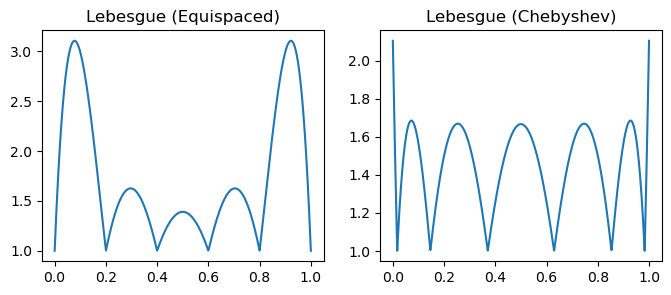

In [3]:
lebesgue_equispaced = sum(abs(V_e), axis = 1)
lebesgue_chebyshev = sum(abs(V_c), axis = 1)

fig, ax = subplots(1, 2, figsize = (8, 3))
ax[0].plot(x, lebesgue_equispaced)
ax[0].set_title("Lebesgue (Equispaced)")
ax[1].plot(x, lebesgue_chebyshev)
ax[1].set_title("Lebesgue (Chebyshev)")
show()

Plot the function $f(x)$ and the polynomial interpolation using both equispaced and Chebyshev nodes.


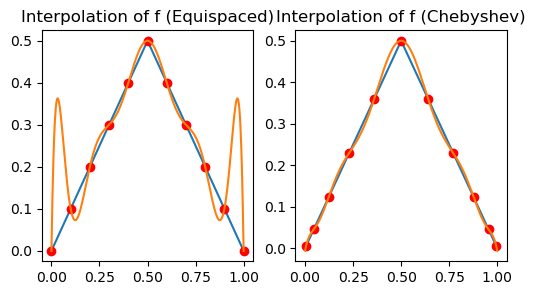

In [4]:
def f(x):
    return -np.abs(x - 1 / 2) + 1 / 2

n = 10  # Higher degree is used to mark the difference between Equispaced and Chebyshev points

X_equispaced = linspace(0, 1, n + 1)
X_chebyshev = chebyshev_nodes(n + 1)

V_e = array([lagrange_basis(X_equispaced, i, x) for i in range(len(X_equispaced))]).T
V_c = array([lagrange_basis(X_chebyshev, i, x) for i in range(len(X_chebyshev))]).T

fig, ax = subplots(1, 2, figsize = (6, 3))
ax[0].plot(x, f(x))
ax[0].plot(X_equispaced, f(X_equispaced), "ro")
ax[0].plot(x, V_e.dot(f(X_equispaced)))
ax[0].set_title("Interpolation of f (Equispaced)")
ax[1].plot(x, f(x))
ax[1].plot(X_chebyshev, f(X_chebyshev), "ro")
ax[1].plot(x, V_c.dot(f(X_chebyshev)))
ax[1].set_title("Interpolation of f (Chebyshev)")
show()

Compute and plot the error between $f(x)$ and the interpolation as the degree of the polynomial increase using both equispaced and Chebyshev nodes.


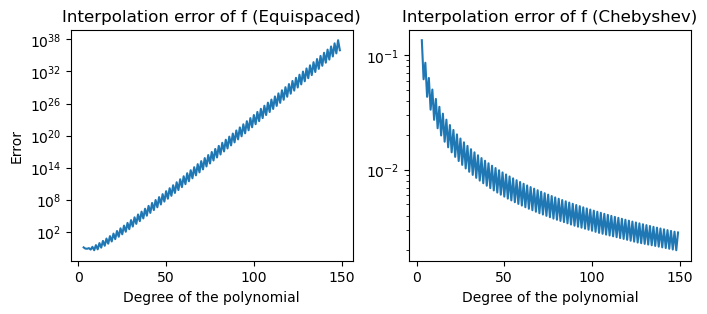

In [5]:
N = arange(3, 150)

errors_e = []
for i, n in enumerate(N):
    X = np.linspace(0, 1, n + 1)
    V_e = np.array([lagrange_basis(X, j, x) for j in range(len(X))]).T
    errors_e.append(max(abs(f(x) - V_e.dot(f(X)))))

errors_c = []
for i, n in enumerate(N):
    X = chebyshev_nodes(n + 1)
    V_c = np.array([lagrange_basis(X, j, x) for j in range(len(X))]).T
    errors_c.append(max(abs(f(x) - V_c.dot(f(X)))))
    
fig, ax = subplots(1, 2, figsize = (8, 3))
ax[0].semilogy(N, errors_e)
ax[0].set_title("Interpolation error of f (Equispaced)")
ax[0].set_xlabel("Degree of the polynomial")
ax[0].set_ylabel("Error")
ax[1].semilogy(N, errors_c)
ax[1].set_title("Interpolation error of f (Chebyshev)")
ax[1].set_xlabel("Degree of the polynomial")
show()

Compute and plot the Lebesgue function as the number of nodes increase using both equispaced and Chebyshev nodes.


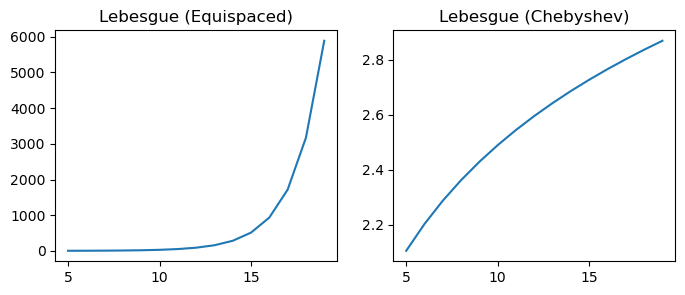

In [6]:
N = arange(5, 20)

lebesgue_equispaced = zeros(len(N))
for i, n in enumerate(N):
    X = linspace(0, 1, n + 1)
    V_e = array([lagrange_basis(X, j, x) for j in range(len(X))]).T
    lebesgue_equispaced[i] = max(abs(V_e).sum(axis = 1))

lebesgue_chebyshev = zeros(len(N))
for i, n in enumerate(N):
    X = chebyshev_nodes(n + 1)
    V_c = array([lagrange_basis(X, j, x) for j in range(len(X))]).T
    lebesgue_chebyshev[i] = max(abs(V_c).sum(axis = 1))

fig, ax = subplots(1, 2, figsize = (8, 3))
ax[0].plot(N, lebesgue_equispaced)
ax[0].set_title("Lebesgue (Equispaced)")
ax[1].plot(N, lebesgue_chebyshev)
ax[1].set_title("Lebesgue (Chebyshev)")
show()

**Second exercise**

---

Consider the following one-dimensional PDE:

$$
-u_{xx}(x) = f(x)\quad\mathrm{ in }\ \Omega = (0, 1)
$$

$$
u(x) = 0, \quad\mathrm{ on }\ \partial\Omega = \{0, 1\}.
$$

Implement a function that given the domain interval, the forcing function, the number of discretization points, returns the matrix $A$ and the right hand side $b$.

Let $x_i$ with $i=1,2,...,N-1$ the internal discretization points. Use the following $4^{th}$ order central finite difference approximation for $i = 2,...,N-2$:
$$u_{xx}(x_i) = \frac{-u_{i-2}+16u_{i-1}-30u_i+16u_{i+1}-u_{i+2}}{12h^2},$$
derive (by using the Taylor series expansion/undetermined coefficients method) and use a $4^{th}$ order forward finite difference approximation for $i=1$ and a $4^{th}$ order backward finite difference approximation scheme for $i = N-1$.


In [7]:
def finDif(omega, f, n, bc):
	x = linspace(omega[0], omega[1], n)
	h = (omega[1] - omega[0]) / (n - 1)

	a0 = ones((n - 2))
	a1 = -16 * ones((n - 1))
	a2 = 30 * ones((n))

	A = diag(a0, -2) + diag(a1, -1) + diag(a2) + diag(a1, +1)  + diag(a0, +2)
	
	b = f(x)

	# Forwards difference approximation
	A[1, 0] = 45
	A[1, 1] = -154
	A[1, 2] = 214
	A[1, 3] = -156
	A[1, 4] = 61
	A[1, 5] = -10

	# Backwards difference approximation
	A[-2, -1] = 45
	A[-2, -2] = -154
	A[-2, -3] = 214
	A[-2, -4] = -156
	A[-2, -5] = 61
	A[-2, -6] = -10

	# Boundary conditions
	A[0,:] = bc[0]
	A[:,0] = bc[0]
	A[0,0] = 1

	A[-1,:] = bc[0]
	A[:,-1] = bc[0]
	A[-1,-1] = 1

	b[0] = bc[0]
	b[-1] = bc[-1]
	return A / (12 * h**2), b

Call the function using:


In [8]:
def f(x):
	return -abs(x - 0.5 * np.ones(len(x))) + 0.5 * np.ones(len(x))

omega = [0, 1]
n = 50
bc = [0, 0]
A, b = finDif(omega, f, n, bc)

Implement a function that computes the LU of the system matrix $A$


In [9]:
def LU(A):
	N = len(A)
	U = A.copy()
	L = eye(N)

	for i in range(N):
		multiplier = U[i + 1:, i] / U[i, i]
		L[i + 1:, i] = multiplier
		U[i + 1:] -= multiplier[:, newaxis] * U[i]

	return L, U

Implement forward and backward substitution functions to exploit the developed factorization methods to solve the derived linear system of equations.


In [10]:
def L_solve(L, rhs):
	N = len(L)
	x = zeros_like(rhs)
	
	x[0] = rhs[0] / L[0, 0]

	for i in range(N):
		x[i] = (rhs[i] - dot(L[i, 0:i], x[0:i]))  / L[i, i]
	
	return x

In [11]:
def U_solve(U, rhs):
	N = len(U)
	x = zeros_like(rhs)

	x[-1] = rhs[-1] / U[-1, -1]

	for i in reversed(range(N - 1)):
		x[i] = (rhs[i] - dot(U[i, i+1:N], x[i+1:N])) / U[i, i]

	return x

Solve the derived linear system using the implemented functions and plot the computed solution:


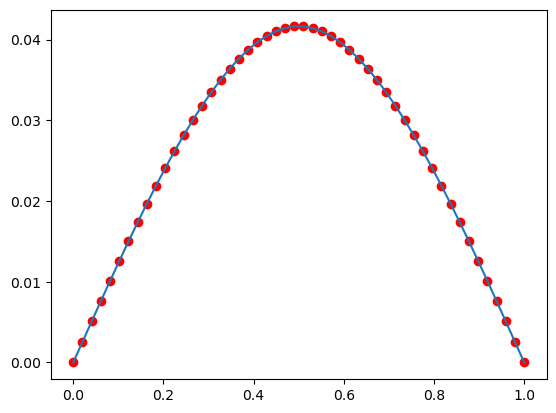

In [12]:
def LU_solver(A, b):
	L, U = LU(A)
	y = L_solve(L, b)
	return U_solve(U, y)

u = LU_solver(A, b)
u_ex = linalg.solve(A, b)

x = np.linspace(omega[0], omega[1], n)
plot(x, u, 'ro', label = 'Computed')
plot(x, u_ex, label = 'Exact')
show()

Produce a plot and a table where you show the decay of the error vs the number of grid points.
(The exact solution for the above problem can be considered the one obtained from the function 'numpy.linalg.solve' avaliable on numpy)


,N,error
0,10,2.775558e-17
1,15,5.551115e-17
2,20,9.714451e-17
3,25,4.163336e-17
4,30,2.151057e-16
5,35,4.163336e-17
6,40,1.110223e-16
7,45,2.081668e-16
8,50,2.983724e-16
9,55,4.302114e-16


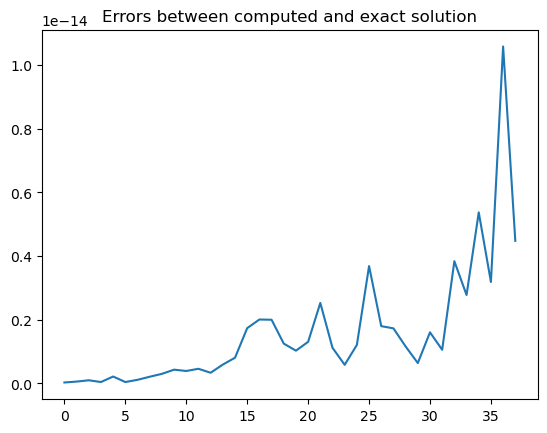

In [13]:
N = arange(10, 200, 5)

errors = []
for i in N:
	A, b = finDif(omega, f, i, bc)
	L, U = LU(A)
	y = L_solve(L, b)
	u = U_solve(U, y)
	u_ex = linalg.solve(A, b)
	error = max(abs(u - u_ex))
	errors.append(error)

display(DataFrame({'N' : N, 'error' : errors}))
plot(errors, label = "error")
title('Errors between computed and exact solution')
show()

# Error increasing maybe due to the fact that we are not using an analytical solution to compute the error

Exploit the derived LU factorization to compute the condition number of the system's matrix $A$ using the original problem formulation.


In [14]:
def inverse(A):
	L, U = LU(A)
	b = eye(len(A), len(A))

	y = L_solve(L, b)
	u = U_solve(U, y)
	return u

def condNumb(A):
	A_inv = inverse(A)
	return linalg.norm(A, inf) * linalg.norm(A_inv, inf)

cond = condNumb(A)
cond_ex = linalg.cond(A, inf)
print(f'Computed condition number: {cond}\nExact condition number: {cond_ex}\nDifference: {abs(cond - cond_ex)}')

Computed condition number: 233264.79166680036
Exact condition number: 233264.79166677568
Difference: 2.468004822731018e-08


Compute the inverse of the matrix A exploiting the derived LU factorization


In [15]:
A_inv = inverse(A)
I = dot(A, A_inv)
I_ex = eye(len(A))
if allclose(I, I_ex):
	print('Inverse of A computed correctly.')

Inverse of A computed correctly.


Implement a preconditioned Gradient method to solve the original linear system of equations using an iterative method and plot the solution.


Number of iterations: 1
50


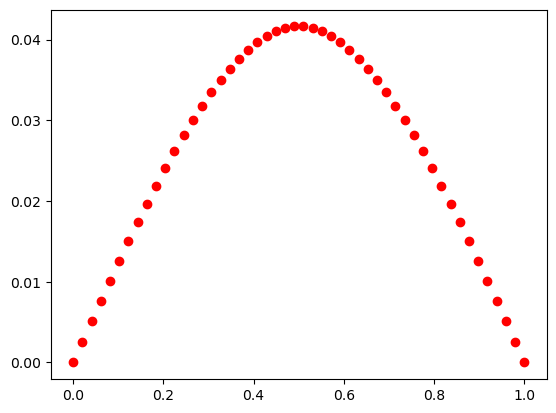

In [16]:
def gradient(A, b, P, nmax = 10000, eps = 1e-10):
	x = zeros_like(b)

	tol = eps + 1.

	i = 0

	r = b - dot(A, x)

	while tol > eps and i < nmax:
		i += 1
		z = linalg.solve(P, r)
		alpha = dot(r, z) / dot(z, dot(A, z))
		x = x + alpha * z
		r = r - alpha * dot(A, z)
		tol = linalg.norm(r, 2)
	
	print(f'Number of iterations: {i}')
	return x

n = 50
A, b = finDif(omega, f, n, bc)

u = gradient(A, b, A)
x = np.linspace(omega[0], omega[1], n)
print(n)
plot(x, u, 'ro', label = 'Computed')
show()

**Third exercise**

---

Consider the following time dependent variation of the PDE starting from the orginal problem formulation:

$$
u'(t)-k(x)u_{xx} = \alpha(t)f(x)
$$

for $t\in [0,T]$, with $u(t=0)=0$, $k(x) = x$, $\alpha(t) = \cos^2(t)$ and $T = 4\pi$

Use the same finite difference scheme to derive the semi-discrete formulation and solve it using a forward Euler's method for the first time step and a backward differencing formula of second order for the others time steps.

Plot the time dependent solution at $x = 1/3$, $x = 1/2$, $x=1$.


In [17]:
# TODO